## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
lead = pd.read_csv("D:/Raghu/Study/DataScience/IIIT-B/Course/Predictive Analysis/Logistic Regression/GroupAssignment_LeadCaseStudy/Lead+Scoring+Case+Study/Lead Scoring Assignment\Leads.csv")
lead1 = pd.read_csv("D:/Raghu/Study/DataScience/IIIT-B/Course/Predictive Analysis/Logistic Regression/GroupAssignment_LeadCaseStudy/Lead+Scoring+Case+Study/Lead Scoring Assignment\Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
###Dropping Prospect ID, Lead Number and Country
###Prospect ID, Lead Number are unique numbers to identify rows which are of no Use
###We have identified during EDA That most of the leads are from Either India on NULL hence this column has no significance hence dropping this column
lead = lead.drop(['Prospect ID','Country'], 1)
lead.shape

(9240, 35)

In [7]:
### Missing Data Handling
lead.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [8]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [9]:
#lead[lead.isnull().sum(axis=1) > 5]
100*(len(lead[lead.isnull().sum(axis=1) > 10].index) / len(lead.index))

7.0995670995671

In [10]:
###Replacing Blank with NAN and "Select" with NAN
lead['How did you hear about X Education'].replace( to_replace=['Select'], value=np.nan, inplace=True )
lead['How did you hear about X Education'].replace( to_replace=[np.nan], value='NoData', inplace=True )

lead['Specialization'].replace( to_replace=['Select'], value=np.nan, inplace=True )
lead['Specialization'].replace( to_replace=[''], value=np.nan, inplace=True )
lead['Specialization'].replace( to_replace=[np.nan], value='NoData', inplace=True )

In [11]:
###Replacing Blank with NAN and "Select" with NAN

lead['Lead Profile'].replace( to_replace=['Select'], value=np.nan, inplace=True )
lead['Lead Profile'].replace( to_replace=[''], value=np.nan, inplace=True )

In [12]:
###Replacing Blank with NAN and "Select" with NAN

lead['City'].replace( to_replace=['Select'], value=np.nan, inplace=True )
lead['City'].replace( to_replace=[''], value=np.nan, inplace=True )

In [13]:
###Replacing NULL with some Value "NoData"
lead['What is your current occupation'].replace( to_replace=[np.nan], value='NoData', inplace=True )
lead['What matters most to you in choosing a course'].replace( to_replace=[np.nan], value='NoData', inplace=True )
lead['Tags'].replace( to_replace=[np.nan], value='NoData', inplace=True )
lead['Last Activity'].replace( to_replace=[np.nan], value='NoData', inplace=True )
lead['Lead Source'].replace( to_replace=[np.nan], value='NoData', inplace=True )
lead['TotalVisits'].replace( to_replace=[np.nan], value=1, inplace=True )
lead['Page Views Per Visit'].replace( to_replace=[np.nan], value=1, inplace=True )


In [14]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
###Dropping How did you hear about X Education, Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,City
###The above COllumns have been removed due to High NUL values which is > 40%

lead = lead.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','City'], 1)
lead.shape

(9240, 27)

In [16]:
#lead[lead.isnull().sum(axis=1) > 5]
100*(len(lead[lead.isnull().sum(axis=1) > 4].index) / len(lead.index))

0.0

In [17]:
#Replacing "Yes"/"No" values with 0 and 1 values

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)


In [ ]:
lead.info()

### Step 2: Data Preparation

In [ ]:
lead.columns

#### For categorical variables with multiple levels, create dummy features 

In [18]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [ ]:
lead.head()

#### Dropping the repeated variables

In [19]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','Last Notable Activity'], 1)

In [ ]:
lead.info()

Now all the variables are as numeric.

In [20]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.408983,487.698268,2.342614,0.001515,0.0,0.000216,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,23405.995698,0.270435,0.014711,0.486714,4.827778,548.021466,2.151647,0.038898,0.0,0.014711,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,650506.100000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,655404.050000,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,659592.980000,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


From the distribution shown above, there no outliers in your data. The numbers are gradually increasing.

In [21]:
# Adding up the missing values (column-wise)
lead.isnull().sum()

Lead Number                                               0
Do Not Email                                              0
Do Not Call                                               0
Converted                                                 0
TotalVisits                                               0
Total Time Spent on Website                               0
Page Views Per Visit                                      0
Search                                                    0
Magazine                                                  0
Newspaper Article                                         0
X Education Forums                                        0
Newspaper                                                 0
Digital Advertisement                                     0
Through Recommendations                                   0
Receive More Updates About Our Courses                    0
Update me on Supply Chain Content                         0
Get updates on DM Content               

Now we don't have any missing values

### Step 3: Test-Train Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Putting feature variable to X
X = lead.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
# Putting response variable to y
y = lead['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 4: Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.649605,-0.885371,-1.075489,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.106392,0.005716,-0.462223,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.295392,-0.691418,0.077266,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.295392,1.365219,1.230021,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.649605,-0.885371,-1.075489,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
### Checking the Churn Rate
conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion

38.53896103896104

We have almost 39% COnversion rate

### Step 5: Looking at Correlations

In [34]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

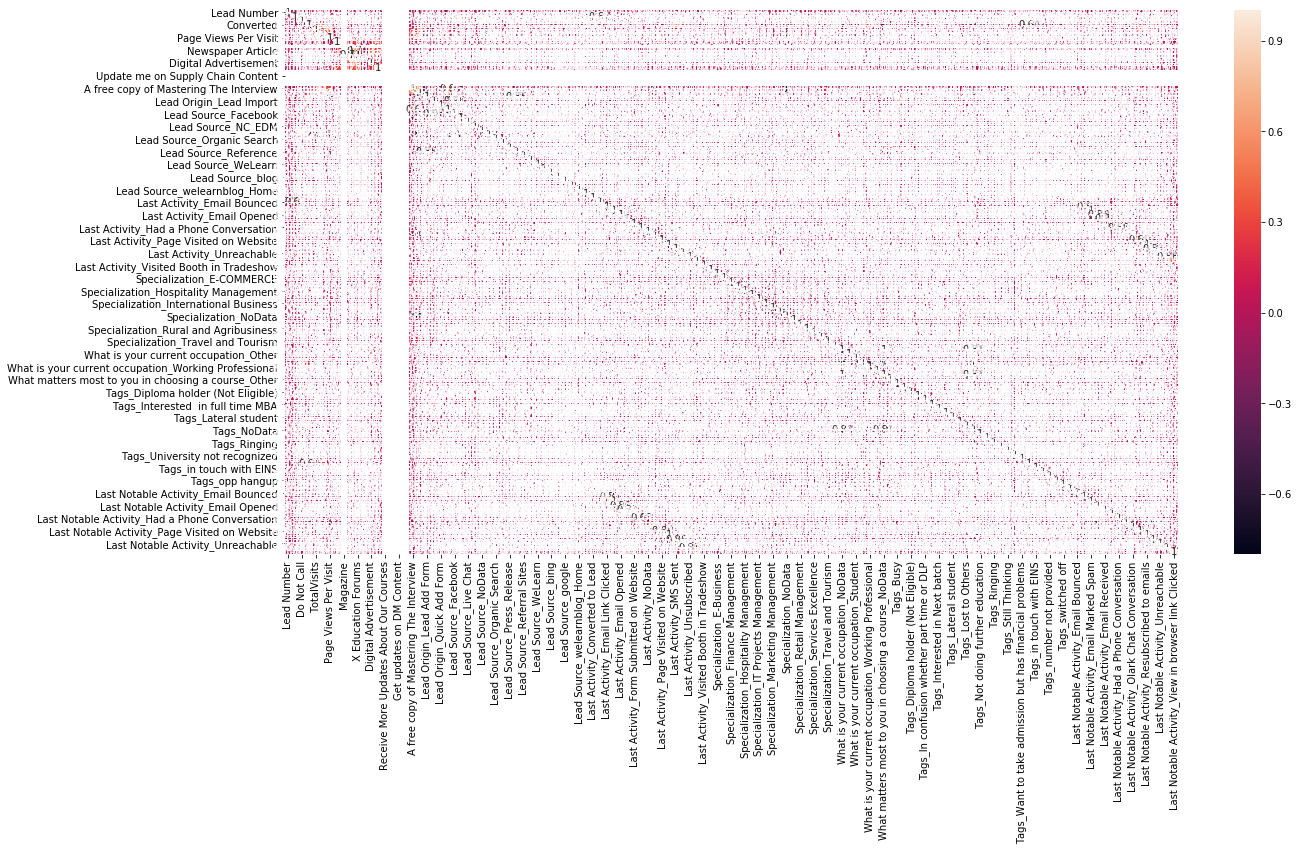

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.show()

#### Step 6: Performing PCA as we have large number of columns and it is not possible manual removal of cobblumns

In [38]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [39]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [40]:
pca.components_

array([[ 3.00274692e-03, -1.24287805e-06,  4.98951159e-01, ...,
         7.39497788e-04, -3.55869598e-04, -0.00000000e+00],
       [ 2.63901382e-02, -1.97404869e-04,  4.95594796e-01, ...,
         6.93159873e-04,  3.55564449e-04,  0.00000000e+00],
       [-6.83011971e-03,  4.96645790e-05,  1.43504182e-01, ...,
         1.28177024e-04, -2.44540347e-04,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -5.40902287e-16, -4.97441469e-17, ...,
         1.06168029e-02,  1.06168029e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  2.32452946e-16, -8.05877629e-17, ...,
        -1.83350753e-01, -1.83350753e-01,  0.00000000e+00]])

In [45]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC2':pca.components_[1],'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.003003,0.026390,Do Not Email
1,-0.000001,-0.000197,Do Not Call
2,0.498951,0.495595,TotalVisits
3,0.436969,-0.565375,Total Time Spent on Website
4,0.590898,0.240813,Page Views Per Visit


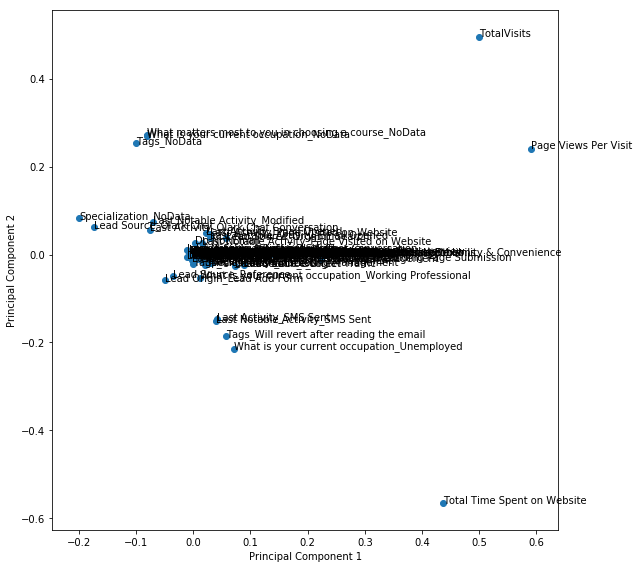

In [46]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [47]:
pca.explained_variance_ratio_

array([2.40900466e-01, 1.16315516e-01, 9.04967220e-02, 7.26514608e-02,
       6.81729627e-02, 5.63985827e-02, 4.70709641e-02, 3.19203282e-02,
       2.77770340e-02, 1.75757229e-02, 1.55000271e-02, 1.35873922e-02,
       1.30707958e-02, 1.24639869e-02, 1.14397496e-02, 1.12118006e-02,
       1.09343441e-02, 9.18692339e-03, 9.02771209e-03, 8.36977404e-03,
       8.15797418e-03, 6.71758597e-03, 6.58141220e-03, 6.16018646e-03,
       5.42219344e-03, 4.96591878e-03, 4.79571540e-03, 4.55293955e-03,
       4.37514711e-03, 3.69368121e-03, 3.30295115e-03, 3.17779562e-03,
       3.06718187e-03, 2.77794108e-03, 2.54028872e-03, 2.50305931e-03,
       2.38591797e-03, 2.31815423e-03, 2.27510691e-03, 2.16167851e-03,
       2.02218644e-03, 1.99034805e-03, 1.89992844e-03, 1.88396427e-03,
       1.74252617e-03, 1.65441711e-03, 1.61044825e-03, 1.58568791e-03,
       1.51174688e-03, 1.37808657e-03, 1.34988400e-03, 1.33430228e-03,
       1.20016395e-03, 1.09775498e-03, 9.54377531e-04, 9.37328488e-04,
      

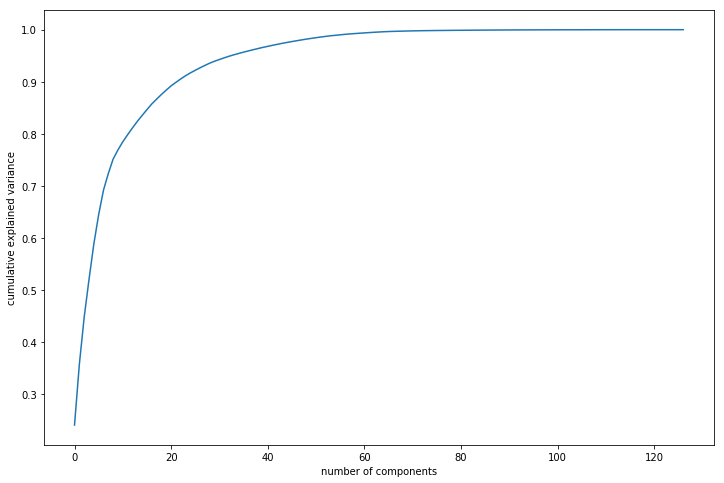

In [48]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 30 components are enough to describe 90% of the variance in the dataset
We'll choose 30 components for our modeling

In [49]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [50]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(6468, 30)

In [53]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

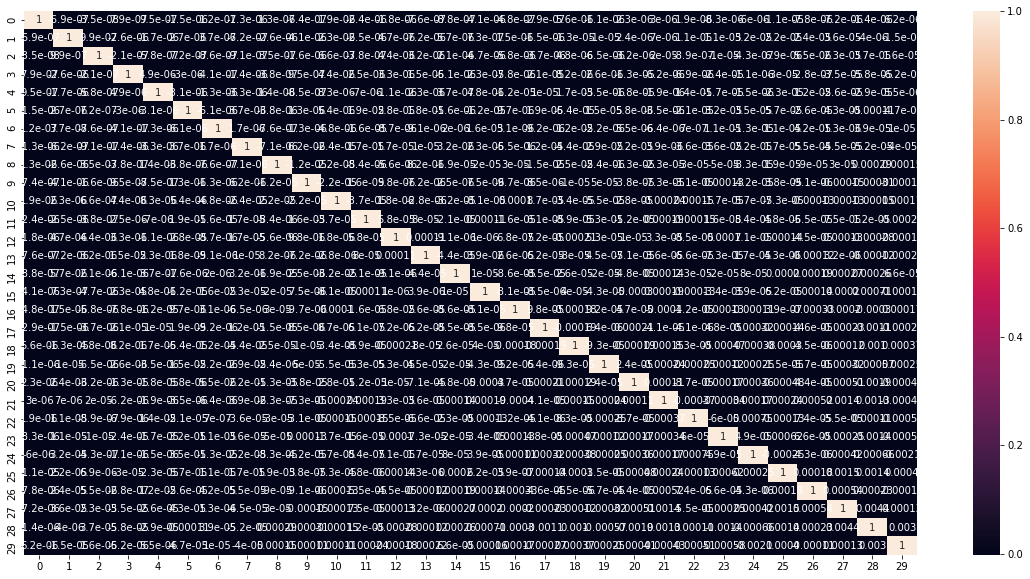

In [54]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [55]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00437826964020061 , min corr:  -0.0020644223803037457


In [56]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2772, 30)

In [57]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [58]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.53'

In [61]:
pca_again = PCA(0.95)

In [62]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 30 components

(6468, 34)

In [63]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [64]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2772, 34)

In [65]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.53'

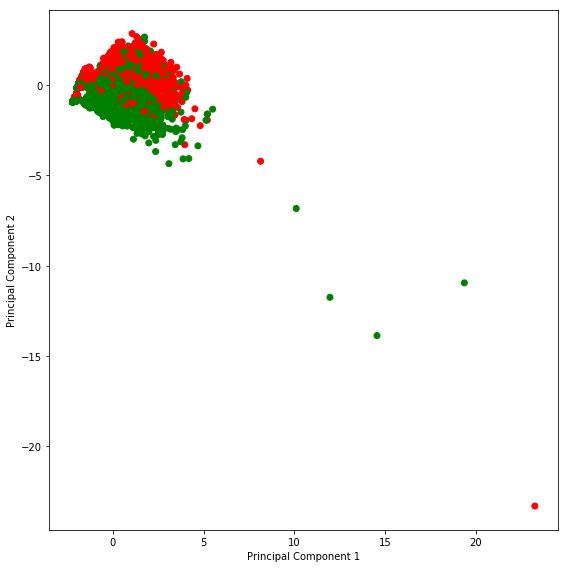

In [66]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [73]:
pca_last = PCA(n_components=1)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(2772, 1)

In [74]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.62'

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [75]:
import statsmodels.api as sm

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                          117
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        07:45:11   Pearson chi2:                 3.86e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     2.22e+14   6.25e+07   3.55e+06      0.000    2.22e+14    2.22e+14
Do Not Email                                                            -2.881e+14   4.48e+06  -6.43e+07      0.000   -2.88e+14   -2.88e+14
Do Not Call                                                              3.935e+15   4.78e+07   8.24e+07      0.000    3.94e+15    3.94e+15
TotalVisits                                                              4.585e+13      1e+06   4.57e+07      0.000    4.59e+13    4.59e+13
Total Time Spent on Website                                               3.47e+14   1.03e+06   3.38e+08      0.000    3.47e+14    3.47e+14
Page Views Per Visit                                                    -3.175e+12   1.21e+06  -2.62e+06      0.000   -3.17e+12   -3.17e+12
Search                                                                   2.402e+14   2.21e+07   1.09e+07      0.000     2.4e+14     2.4e+14
Magazine                                                                   90.2182   1.46e-06   6.18e+07      0.000      90.218      90.218
Newspaper Article                                                        4.059e+15   6.74e+07   6.02e+07      0.000    4.06e+15    4.06e+15
X Education Forums                                                      -8.788e+15   1.12e+08  -7.87e+07      0.000   -8.79e+15   -8.79e+15
Newspaper                                                               -5.708e+15   6.73e+07  -8.48e+07      0.000   -5.71e+15   -5.71e+15
Digital Advertisement                                                   -2.595e+15   4.82e+07  -5.39e+07      0.000   -2.59e+15   -2.59e+15
Through Recommendations                                                  1.433e+14   2.86e+07   5.01e+06      0.000    1.43e+14    1.43e+14
Receive More Updates About Our Courses                                     61.5962   3.78e-07   1.63e+08      0.000      61.596      61.596
Update me on Supply Chain Content                                         -24.3350   3.66e-07  -6.65e+07      0.000     -24.335     -24.335
Get updates on DM Content                                                  11.8535   7.68e-07   1.54e+07      0.000      11.853      11.853
I agree to pay the amount through cheque                                  -76.9706    1.3e-06  -5.94e+07      0.000     -76.971     -76.971
A free copy of Mastering The Interview                                  -8.158e+13   2.69e+06  -3.03e+07      0.000   -8.16e+13   -8.16e+13
Lead Origin_Landing Page Submission                                     -1.256e+14   3.45e+06  -3.64e+07      0.000   -1.26e+14   -1.26e+14
Lead Origin_Lead Add Form                                               -4.369e+14

### Step 8: Feature Selection Using RFE

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 61),
 ('TotalVisits', False, 49),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 78),
 ('Search', False, 17),
 ('Magazine', False, 95),
 ('Newspaper Article', False, 81),
 ('X Education Forums', False, 62),
 ('Newspaper', False, 64),
 ('Digital Advertisement', False, 36),
 ('Through Recommendations', False, 90),
 ('Receive More Updates About Our Courses', False, 92),
 ('Update me on Supply Chain Content', False, 94),
 ('Get updates on DM Content', False, 97),
 ('I agree to pay the amount through cheque', False, 93),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Origin_Quick Add Form', False, 51),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 84),
 ('Lead 

In [81]:
col = X_train.columns[rfe.support_]

In [82]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_NoData',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 

##### Assessing the model with StatsModels

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1112.2
Date:                Sun, 03 Mar 2019   Deviance:                       2224.3
Time:                        08:12:26   Pearson chi2:                 1.23e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.2148      0.240    -13.410      0.000      -3.685      -2.745
Do Not Email                                              -0.8774      0.248     -3.534      0.000      -1.364      -0.391
Total Time Spent on Website                                0.8563      0.057     15.070      0.000       0.745       0.968
Lead Source_Facebook                                      -1.1636      0.685     -1.700      0.089      -2.506       0.178
Lead Source_Welingak Website                               3.0745      0.744      4.130      0.000       1.615       4.534
Last Activity_SMS Sent                                     2.1000      0.130     16.193      0.000       1.846       2.354
Specialization_Travel and Tourism                         -1.2352      0.452     -2.735      0.006      -2.120      -0.350
What is your current occupation_NoData                    22.1128   5.64e+04      0.000      1.000   -1.11e+05    1.11e+05
What matters most to you in choosing a course_NoData     -24.8624   5.64e+04     -0.000      1.000   -1.11e+05    1.11e+05
Tags_Busy                                                  2.1466      0.324      6.628      0.000       1.512       2.781
Tags_Closed by Horizzon                                    9.7834      1.036      9.441      0.000       7.752      11.814
Tags_Diploma holder (Not Eligible)                       -22.1528   2.85e+04     -0.001      0.999   -5.59e+04    5.58e+04
Tags_Interested  in full time MBA                         -0.0743      0.776     -0.096      0.924      -1.595       1.446
Tags_Interested in Next batch                             26.3450   8.89e+04      0.000      1.000   -1.74e+05    1.74e+05
Tags_Lateral student                                      28.2602   1.22e+05      0.000      1.000   -2.39e+05    2.39e+05
Tags_Lost to EINS                                          9.6527      0.798     12.096      0.000       8.089      11.217
Tags_NoData                                                3.9499      0.270     14.648      0.000       3.421       4.478
Tags_Not doing further education                          -0.9342      1.044     -0.894      0.371      -2.981       1.113
Tags_Ringing                                              -1.6239      0.327     -4.972      0.000      -2.264      -0.984
Tags_Shall take in the next coming month                  29.5390   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Want to take admission but has financial problems     2.3683      1.341      1.767      0.077      -0.259       4.996
Tags_Will revert after reading the email                   6.5155      0.288     22.626      0.000       5.951       7.080
Tags_in touch with EINS                                    2.6521      0.835      3.177

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003696
6795    0.677006
3516    0.004361
8105    0.172265
3934    0.178166
4844    0.999085
3297    0.004220
8071    0.992146
987     0.047360
7423    0.999169
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00369587, 0.67700625, 0.0043607 , 0.17226548, 0.17816608,
       0.99908521, 0.00422015, 0.99214623, 0.04735965, 0.99916852])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.003696,1871
1,0,0.677006,6795
2,0,0.004361,3516
3,0,0.172265,8105
4,0,0.178166,3934


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [90]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head(100)

,Converted,Converted_Prob,Lead Number,predicted
0,0,3.695868e-03,1871,0
1,0,6.770062e-01,6795,0
2,0,4.360699e-03,3516,0
3,0,1.722655e-01,8105,0
4,0,1.781661e-01,3934,0
5,1,9.990852e-01,4844,1
6,0,4.220148e-03,3297,0
7,1,9.921462e-01,8071,1
8,0,4.735965e-02,987,0
9,1,9.991685e-01,7423,1


In [91]:
from sklearn import metrics

In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3941   61]
 [ 449 2017]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9211502782931354


#### Checking VIFs

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What matters most to you in choosing a course_...,152.49
6,What is your current occupation_NoData,148.21
15,Tags_NoData,5.15
4,Last Activity_SMS Sent,1.69
28,Last Notable Activity_Modified,1.61
20,Tags_Will revert after reading the email,1.45
0,Do Not Email,1.16
17,Tags_Ringing,1.15
3,Lead Source_Welingak Website,1.13
1,Total Time Spent on Website,1.13


In [102]:
col[7]

'What matters most to you in choosing a course_NoData'

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [103]:
col = col.drop('What matters most to you in choosing a course_NoData', 1)

col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_NoData', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_NoData',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activi

In [104]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.9
Date:                Sun, 03 Mar 2019   Deviance:                       2233.7
Time:                        08:22:58   Pearson chi2:                 1.25e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.2040      0.240    -13.368      0.000      -3.674      -2.734
Do Not Email                                              -0.9672      0.244     -3.965      0.000      -1.445      -0.489
Total Time Spent on Website                                0.8552      0.057     15.080      0.000       0.744       0.966
Lead Source_Facebook                                      -1.1432      0.686     -1.666      0.096      -2.489       0.202
Lead Source_Welingak Website                               3.1358      0.744      4.213      0.000       1.677       4.595
Last Activity_SMS Sent                                     2.1033      0.129     16.255      0.000       1.850       2.357
Specialization_Travel and Tourism                         -1.2270      0.454     -2.704      0.007      -2.116      -0.338
What is your current occupation_NoData                    -2.6976      0.158    -17.022      0.000      -3.008      -2.387
Tags_Busy                                                  2.1417      0.324      6.609      0.000       1.507       2.777
Tags_Closed by Horizzon                                    9.7937      1.036      9.450      0.000       7.762      11.825
Tags_Diploma holder (Not Eligible)                       -22.1534   2.85e+04     -0.001      0.999   -5.58e+04    5.58e+04
Tags_Interested  in full time MBA                         -0.0677      0.776     -0.087      0.930      -1.588       1.452
Tags_Interested in Next batch                             26.3622   8.88e+04      0.000      1.000   -1.74e+05    1.74e+05
Tags_Lateral student                                      28.2674   1.22e+05      0.000      1.000   -2.39e+05    2.39e+05
Tags_Lost to EINS                                          9.6239      0.798     12.064      0.000       8.060      11.187
Tags_NoData                                                3.8971      0.269     14.500      0.000       3.370       4.424
Tags_Not doing further education                          -0.9190      1.045     -0.880      0.379      -2.967       1.129
Tags_Ringing                                              -1.6333      0.327     -5.000      0.000      -2.274      -0.993
Tags_Shall take in the next coming month                  29.5273   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Want to take admission but has financial problems     2.3819      1.341      1.776      0.076      -0.246       5.010
Tags_Will revert after reading the email                   6.5204      0.288     22.621      0.000       5.955       7.085
Tags_in touch with EINS                                    2.6500      0.835      3.173      0.002       1.013       4.287
Tags_invalid number                                       -2.1591      1.132     -1.907

In [105]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [106]:
y_train_pred[:10]

array([0.00370459, 0.66773432, 0.00437001, 0.17270524, 0.16845169,
       0.99910044, 0.00422934, 0.99210405, 0.04657429, 0.99918227])

In [107]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [110]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.8 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head(100)

,Converted,Converted_Prob,Lead Number,predicted
0,0,3.704586e-03,1871,0
1,0,6.677343e-01,6795,0
2,0,4.370010e-03,3516,0
3,0,1.727052e-01,8105,0
4,0,1.684517e-01,3934,0
5,1,9.991004e-01,4844,1
6,0,4.229345e-03,3297,0
7,1,9.921041e-01,8071,1
8,0,4.657429e-02,987,0
9,1,9.991823e-01,7423,1


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.920995670995671


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Tags_NoData,5.04
6,What is your current occupation_NoData,4.68
4,Last Activity_SMS Sent,1.69
27,Last Notable Activity_Modified,1.61
19,Tags_Will revert after reading the email,1.45
16,Tags_Ringing,1.15
0,Do Not Email,1.15
1,Total Time Spent on Website,1.13
3,Lead Source_Welingak Website,1.13
8,Tags_Closed by Horizzon,1.10


In [114]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Tags_NoData')
col = col.drop('What is your current occupation_NoData')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [115]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1331.8
Date:                Sun, 03 Mar 2019   Deviance:                       2663.5
Time:                        08:26:14   Pearson chi2:                 1.34e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.4558      0.078    -18.677      0.000      -1.609      -1.303
Do Not Email                                              -0.6640      0.228     -2.913      0.004      -1.111      -0.217
Total Time Spent on Website                                0.7962      0.050     15.780      0.000       0.697       0.895
Lead Source_Facebook                                      -0.4646      0.729     -0.638      0.524      -1.893       0.964
Lead Source_Welingak Website                               5.3204      0.741      7.178      0.000       3.868       6.773
Last Activity_SMS Sent                                     2.1401      0.114     18.767      0.000       1.917       2.364
Specialization_Travel and Tourism                         -1.2144      0.429     -2.828      0.005      -2.056      -0.373
Tags_Busy                                                  0.4087      0.230      1.774      0.076      -0.043       0.860
Tags_Closed by Horizzon                                    8.2401      1.011      8.150      0.000       6.259      10.222
Tags_Diploma holder (Not Eligible)                       -23.7804   2.84e+04     -0.001      0.999   -5.56e+04    5.56e+04
Tags_Interested  in full time MBA                         -1.7036      0.743     -2.293      0.022      -3.160      -0.248
Tags_Interested in Next batch                             24.4787   8.94e+04      0.000      1.000   -1.75e+05    1.75e+05
Tags_Lateral student                                      26.6718   1.21e+05      0.000      1.000   -2.37e+05    2.37e+05
Tags_Lost to EINS                                          6.4818      0.731      8.864      0.000       5.049       7.915
Tags_Not doing further education                          -2.6275      1.021     -2.574      0.010      -4.628      -0.627
Tags_Ringing                                              -3.3710      0.232    -14.559      0.000      -3.825      -2.917
Tags_Shall take in the next coming month                  27.7268   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Want to take admission but has financial problems     1.0322      1.313      0.786      0.432      -1.541       3.606
Tags_Will revert after reading the email                   4.8664      0.179     27.243      0.000       4.516       5.217
Tags_in touch with EINS                                    0.9649      0.807      1.195      0.232      -0.618       2.547
Tags_invalid number                                       -3.8895      1.093     -3.558      0.000      -6.032      -1.747
Tags_number not provided                                 -24.8080      4e+04     -0.001      1.000   -7.84e+04    7.83e+04
Tags_switched off                                         -3.5765      0.525     -6.810

In [116]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [117]:
y_train_pred[:10]

array([0.00394353, 0.1898021 , 0.00459898, 0.1680084 , 0.01860996,
       0.99911926, 0.00446104, 0.99160452, 0.05852407, 0.99919409])

In [118]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [120]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.8 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head(100)

,Converted,Converted_Prob,Lead Number,predicted
0,0,3.943530e-03,1871,0
1,0,1.898021e-01,6795,0
2,0,4.598981e-03,3516,0
3,0,1.680084e-01,8105,0
4,0,1.860996e-02,3934,0
5,1,9.991193e-01,4844,1
6,0,4.461038e-03,3297,0
7,1,9.916045e-01,8071,1
8,0,5.852407e-02,987,0
9,1,9.991941e-01,7423,1


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9066171923314781


The accuracy is still 90%.

##### Let's now check the VIFs again

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_SMS Sent,1.50
17,Tags_Will revert after reading the email,1.38
25,Last Notable Activity_Modified,1.28
0,Do Not Email,1.13
1,Total Time Spent on Website,1.12
14,Tags_Ringing,1.11
7,Tags_Closed by Horizzon,1.08
12,Tags_Lost to EINS,1.04
13,Tags_Not doing further education,1.04
6,Tags_Busy,1.04


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [124]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3945,   57],
       [ 547, 1919]], dtype=int64)

In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9066171923314781

## Metrics beyond simply accuracy

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.778183292781833

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9857571214392804

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01424287856071964


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.9711538461538461


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8782279608192342


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

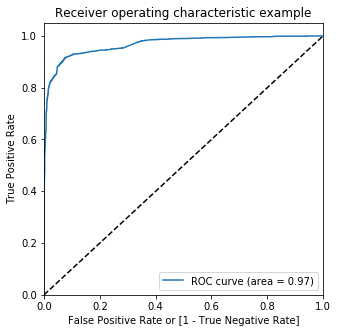

In [136]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003944,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.189802,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.004599,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.168008,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.018610,3934,0,1,0,0,0,0,0,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.784941  0.974047  0.668416
0.2   0.2  0.908782  0.928224  0.896802
0.3   0.3  0.921305  0.914842  0.925287
0.4   0.4  0.922387  0.895783  0.938781
0.5   0.5  0.916976  0.853204  0.956272
0.6   0.6  0.917749  0.830495  0.971514
0.7   0.7  0.916821  0.815085  0.979510
0.8   0.8  0.906617  0.778183  0.985757
0.9   0.9  0.886982  0.718167  0.991004


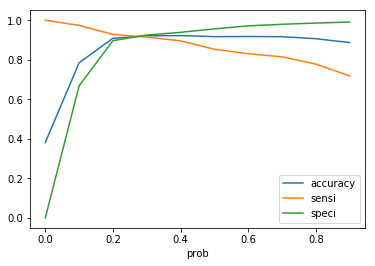

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003944,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.189802,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.004599,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.168008,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.018610,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9213048855905999

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3703,  299],
       [ 210, 2256]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9148418491484185

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.9252873563218391

In [146]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07471264367816093


In [147]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8829745596868884


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9463327370304114


## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [149]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3945,   57],
       [ 547, 1919]], dtype=int64)

##### Precision
TP / TP + FP

In [150]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9711538461538461

##### Recall
TP / TP + FN

In [151]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.778183292781833

Using sklearn utilities for the same

In [152]:
from sklearn.metrics import precision_score, recall_score

In [154]:
?precision_score

In [155]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9711538461538461

In [156]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.778183292781833

### Precision and recall tradeoff

In [157]:
from sklearn.metrics import precision_recall_curve

In [158]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      1
 25      

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

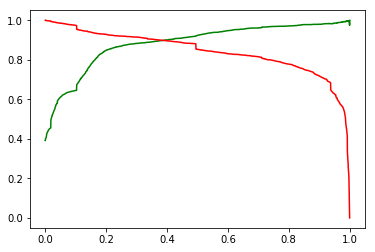

In [160]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [161]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [162]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [184]:
X_test = X_test[col]
X_test.head(100)


,Do Not Email,Total Time Spent on Website,Lead Source_Facebook,Lead Source_Welingak Website,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,...,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0.964504,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9199,0,-0.885371,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,-0.885371,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9186,0,0.234435,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1631,0,0.968164,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8963,0,-0.394998,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8007,0,-0.255938,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5324,0,-0.592611,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [164]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

4269    0.810329
2376    0.992200
7766    0.942223
9199    0.018610
4359    0.937362
9186    0.996787
1631    0.984953
8963    0.956732
8007    0.030350
5324    0.993812
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [168]:
# Let's see the head
y_pred_1.head()

,0
4269,0.810329
2376,0.992200
7766,0.942223
9199,0.018610
4359,0.937362


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [171]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [173]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.810329
1,1,2376,0.992200
2,1,7766,0.942223
3,0,9199,0.018610
4,1,4359,0.937362


In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [175]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [176]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.810329
1,2376,1,0.992200
2,7766,1,0.942223
3,9199,0,0.018610
4,4359,1,0.937362


In [177]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.80 else 0)

In [178]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.810329,1
1,2376,1,0.992200,1
2,7766,1,0.942223,1
3,9199,0,0.018610,0
4,4359,1,0.937362,1


In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9090909090909091

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1653,   24],
       [ 228,  867]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7917808219178082

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9856887298747764

Lets check the variables have more influence on Probability

In [187]:
X_test[col].shape


(2772, 27)

In [189]:
X_test[col].describe()

,Do Not Email,Total Time Spent on Website,Lead Source_Facebook,Lead Source_Welingak Website,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,...,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,0.023314,0.007937,0.018398,0.289322,0.023449,0.022006,0.040043,0.005772,0.012987,...,0.230159,0.000361,0.007576,0.002165,0.021284,0.005772,0.019481,0.001082,0.370851,0.022727
std,0.274247,1.008922,0.088749,0.134411,0.453529,0.151351,0.146729,0.196096,0.075768,0.113239,...,0.421010,0.018993,0.086724,0.046482,0.144356,0.075768,0.138231,0.032886,0.483120,0.149060
min,0.000000,-0.885371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.861584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.413296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.851060,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,3.237051,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
X_test[col].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Total Time Spent on Website,Lead Source_Facebook,Lead Source_Welingak Website,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,...,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,0.023314,0.007937,0.018398,0.289322,0.023449,0.022006,0.040043,0.005772,0.012987,...,0.230159,0.000361,0.007576,0.002165,0.021284,0.005772,0.019481,0.001082,0.370851,0.022727
std,0.274247,1.008922,0.088749,0.134411,0.453529,0.151351,0.146729,0.196096,0.075768,0.113239,...,0.421010,0.018993,0.086724,0.046482,0.144356,0.075768,0.138231,0.032886,0.483120,0.149060
min,0.000000,-0.885371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.861584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.413296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.851060,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
90%,0.000000,1.659625,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
95%,1.000000,1.984497,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
99%,1.000000,2.505207,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000


In [192]:
X_test[col].columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')